In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
from sklearn.decomposition import PCA 

### learning curve

In [5]:
path_string = 'results/avg_acc.seqs'
with open(path_string,'rb') as f:
    avg_acc = pickle.load(f)
    
path_string = 'results/avg_auc.seqs'
with open(path_string,'rb') as f:
    avg_auc = pickle.load(f)
    
path_string = 'results/avg_loss.seqs'
with open(path_string,'rb') as f:
    avg_loss = pickle.load(f)
    
path_string = 'results/test_acc.seqs'
with open(path_string,'rb') as f:
    test_acc = pickle.load(f)
    
path_string = 'results/test_auc.seqs'
with open(path_string,'rb') as f:
    test_auc = pickle.load(f)


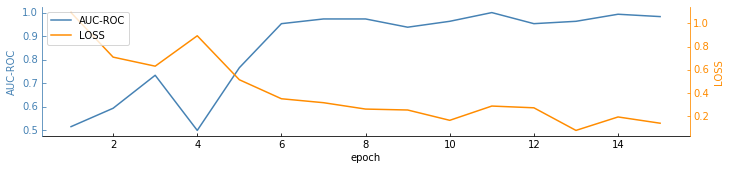

In [8]:
plt.figure(figsize=(10,2))
fig = plt.figure(1) 
ax_cof = HostAxes(fig, [0, 0, 0.9, 0.9])  

#parasite addtional axes, share x
ax_temp = ParasiteAxes(ax_cof, sharex=ax_cof)
#append axes
ax_cof.parasites.append(ax_temp)
#invisible right axis of ax_cof
ax_cof.axis['right'].set_visible(False)
ax_cof.axis['top'].set_visible(False)
ax_temp.axis['right'].set_visible(True)
ax_temp.axis['right'].major_ticklabels.set_visible(True)
ax_temp.axis['right'].label.set_visible(True)

#set label for axis
ax_cof.set_ylabel('AUC-ROC')
ax_cof.set_xlabel('epoch')
ax_temp.set_ylabel('LOSS')
fig.add_axes(ax_cof)

''' #set limit of x, y
ax_cof.set_xlim(0,2)
ax_cof.set_ylim(0,3)
'''
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
curve_cof = ax_cof.plot(x, avg_auc, label="AUC-ROC", color='steelblue')
curve_temp = ax_temp.plot(x, avg_loss, label="LOSS", color='darkorange')

#ax_temp.set_ylim(0,2)
ax_cof.legend()

ax_cof.axis['left'].label.set_color('steelblue')
ax_temp.axis['right'].label.set_color('darkorange')

ax_cof.axis['left'].major_ticks.set_color('steelblue')
ax_temp.axis['right'].major_ticks.set_color('darkorange')

ax_cof.axis['left'].major_ticklabels.set_color('steelblue')
ax_temp.axis['right'].major_ticklabels.set_color('darkorange')

ax_cof.axis['left'].line.set_color('steelblue')
ax_temp.axis['right'].line.set_color('darkorange')


plt.show()

### embedding PCA clustering

In [2]:
# states from all state in sequence of batch data 
# survival states from all state in sequence. the order is time 0 to onset
# dead states from all state in sequence. 

In [3]:
path_string = 'emb/states.seqs'
with open(path_string,'rb') as f:
    states = pickle.load(f)

In [4]:
path_string = 'emb/SurvivalStates.seqs'
with open(path_string,'rb') as f:
    survival = pickle.load(f)

In [5]:
path_string = 'emb/DeadStates.seqs'
with open(path_string,'rb') as f:
    dead = pickle.load(f)

In [11]:
#all 327; survival 264; dead 63
emb=[]
for i in range (len(survival)):
    for j in range(len(survival[i])):
        emb.append(survival[i][j])
for i in range (len(dead)):
    for j in range(len(dead[i])):
        emb.append(dead[i][j])

In [18]:
pca = PCA()
pca.fit(emb)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

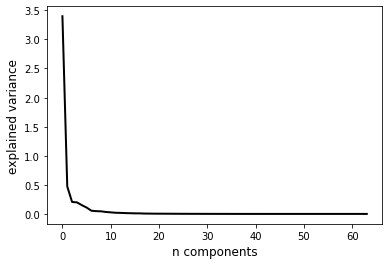

In [24]:
plt.figure()
plt.plot(pca.explained_variance_, 'k', linewidth=2)
plt.xlabel('n components', fontsize=12)
plt.ylabel('explained variance', fontsize=12)
plt.show()

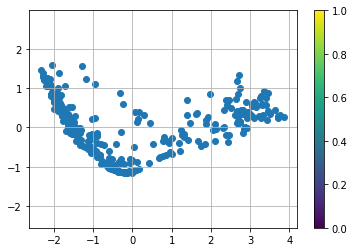

In [27]:
pca = PCA(n_components = 2)
projected = pca.fit_transform(emb) #(1797, 2)
plt.scatter(projected[:,0],projected[:,1])
plt.axis('equal')
plt.grid()
plt.colorbar()